In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib

from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import KMeans, DBSCAN

matplotlib.rc("font", family = "Malgun Gothic")

In [3]:
df_raw = pd.read_csv("직무능력평가.csv", engine = 'python')
df_raw.head()

,EVAL,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
0,43,51,30,39,61,92,45
1,63,64,51,54,63,73,47
2,71,70,68,69,76,86,48
3,61,63,45,47,54,84,35
4,81,78,56,66,71,83,47


In [4]:
scaler = StandardScaler()
df_raw_scaled = scaler.fit_transform(df_raw)
df_raw_scaled[:5]

array([[-1.8076031 , -1.19166169, -1.92300586, -1.50494461, -0.35542617,
         1.77141034,  0.20430138],
       [-0.13647543, -0.19861028, -0.17733772, -0.20508842, -0.15977874,
        -0.18159526,  0.4020124 ],
       [ 0.53197564,  0.25972114,  1.23582221,  1.09476777,  1.11192959,
         1.15467173,  0.50086791],
       [-0.30358819, -0.27499885, -0.67610004, -0.81168798, -1.0401922 ,
         0.9490922 , -0.78425369],
       [ 1.36753948,  0.87082969,  0.23829756,  0.83479653,  0.622811  ,
         0.84630243,  0.4020124 ]])

In [5]:
df_raw_y = df_raw_scaled[:,0]
df_raw_x = df_raw_scaled[:,1::]

Text(0, 0.5, 'sample index')

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


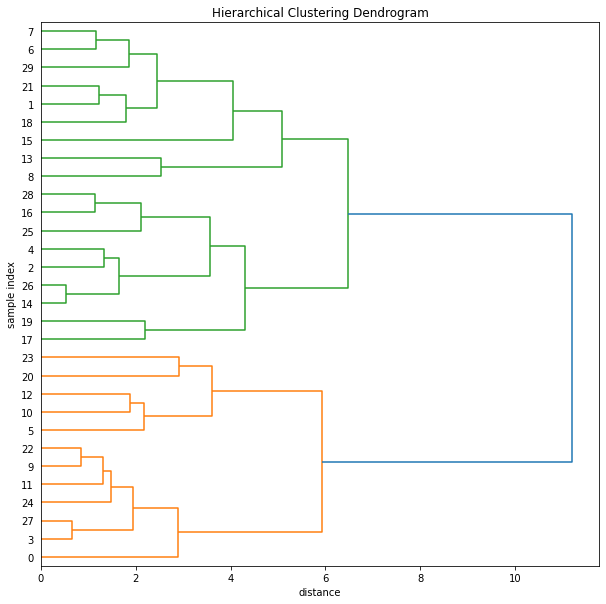

In [6]:
Z_ward = linkage(df_raw_x, method = "ward", metric = "euclidean")
Z_average = linkage(df_raw_x, method = "average", metric = "euclidean")
Z_Minkowski = linkage(df_raw_x, method = "average", metric = "minkowski")

plt.figure(figsize=(10,10))
ax = plt.subplot(111)
dendrogram(Z_ward, leaf_font_size =10, orientation = "right")
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("distance")
plt.ylabel("sample index")

In [7]:
cluster_hierarchical = fcluster(Z=Z_ward, t=5, criterion = "distance")
df_raw["ClusterHierarchical"] = cluster_hierarchical
df_raw.head()

,EVAL,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION,ClusterHierarchical
0,43,51,30,39,61,92,45,1
1,63,64,51,54,63,73,47,5
2,71,70,68,69,76,86,48,3
3,61,63,45,47,54,84,35,1
4,81,78,56,66,71,83,47,3


In [8]:
ds_summary_hc = df_raw.groupby("ClusterHierarchical").agg(["min","mean","max"])
level0 = ds_summary_hc.columns.get_level_values(0)
level1 = ds_summary_hc.columns.get_level_values(1)
ds_summary_hc.columns = level0 + "_" +level1
ds_summary_hc.reset_index(inplace=True)
ds_summary_hc.round(3)


,ClusterHierarchical,EVAL_min,EVAL_mean,EVAL_max,DISSATIS_min,DISSATIS_mean,DISSATIS_max,PRIVILEGE_min,PRIVILEGE_mean,PRIVILEGE_max,...,CHANCE_max,ADVANCE_min,ADVANCE_mean,ADVANCE_max,CRITISM_min,CRITISM_mean,CRITISM_max,PROMOTION_min,PROMOTION_mean,PROMOTION_max
0,1,43,57.429,67,51,58.857,66,30,43.571,52,...,50,51,59.429,66,74,81.143,92,33,38.571,45
1,2,40,53.200,69,37,49.400,62,33,46.800,57,...,58,43,52.000,58,49,60.000,67,25,35.000,49
2,3,50,71.889,85,58,73.889,85,54,63.333,71,...,75,55,74.333,88,74,79.000,86,46,54.667,72
3,4,68,70.000,72,82,82.500,83,72,77.500,83,...,67,59,65.000,71,77,80.000,83,31,33.000,35
4,5,58,69.143,82,61,72.714,90,39,47.143,52,...,72,60,66.286,75,54,72.000,85,35,40.714,47


In [9]:
n_iter_cluster = 15
cluster_range = [i+1 for i in range(n_iter_cluster)]
clus_error = []
for v_n_clus in cluster_range:
    clus = KMeans(v_n_clus)
    clus.fit(df_raw_x)
    clus_error.append(clus.inertia_)
df_error = pd.DataFrame({"NumberofCluster": cluster_range, "Error":clus_error})
df_error

,NumberofCluster,Error
0,1,180.000000
1,2,114.082503
2,3,94.368903
3,4,79.086683
4,5,67.911904
5,6,57.164383
6,7,49.416679
7,8,43.478583
8,9,39.044242
9,10,33.316859


Text(0, 0.5, 'Sum of squared distance')

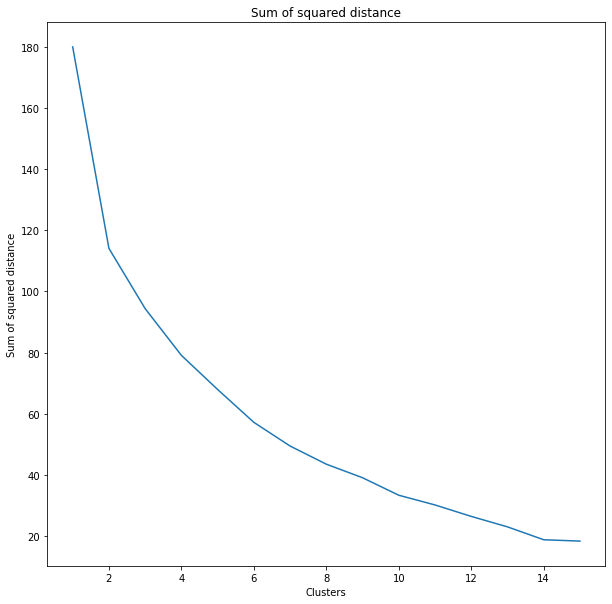

In [10]:
plt.figure(figsize=(10,10))
plt.plot(df_error["NumberofCluster"], df_error["Error"])
plt.title("Sum of squared distance")
plt.xlabel("Clusters")
plt.ylabel("Sum of squared distance")

In [28]:
clus = KMeans(5)
clus.fit(df_raw_x)
cluster_kmeans = [i+1 for i in clus.labels_]
df_raw["ClusterKmeans"] = cluster_kmeans
df_raw.head()

,EVAL,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION,ClusterHierarchical,ClusterKmeans
0,43,51,30,39,61,92,45,1,5
1,63,64,51,54,63,73,47,5,3
2,71,70,68,69,76,86,48,3,1
3,61,63,45,47,54,84,35,1,5
4,81,78,56,66,71,83,47,3,1


In [29]:
ds_summary_km = df_raw.drop("ClusterHierarchical",axis =1, inplace =False).groupby("ClusterKmeans").agg(["min","mean","max"])
level0 = ds_summary_km.columns.get_level_values(0)
level1 = ds_summary_km.columns.get_level_values(1)
ds_summary_km.columns = level0+"_"+level1
ds_summary_km.reset_index(inplace = True)
ds_summary_km.round(3)

,ClusterKmeans,EVAL_min,EVAL_mean,EVAL_max,DISSATIS_min,DISSATIS_mean,DISSATIS_max,PRIVILEGE_min,PRIVILEGE_mean,PRIVILEGE_max,...,CHANCE_max,ADVANCE_min,ADVANCE_mean,ADVANCE_max,CRITISM_min,CRITISM_mean,CRITISM_max,PROMOTION_min,PROMOTION_mean,PROMOTION_max
0,1,65,74.333,85,60,76.556,85,54,63.778,72,...,75,55,75.111,88,74,79.556,86,31,52.333,72
1,2,40,50.500,69,37,48.500,62,33,45.250,57,...,58,43,50.500,55,49,58.250,64,25,35.250,49
2,3,50,65.100,82,53,68.600,90,39,50.300,68,...,72,58,64.900,75,54,72.900,85,34,40.800,52
3,4,68,68.000,68,83,83.000,83,83,83.000,83,...,45,59,59.000,59,77,77.000,77,35,35.000,35
4,5,43,58.167,67,51,57.667,63,30,42.167,47,...,48,51,58.833,66,74,81.333,92,33,38.833,45


findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


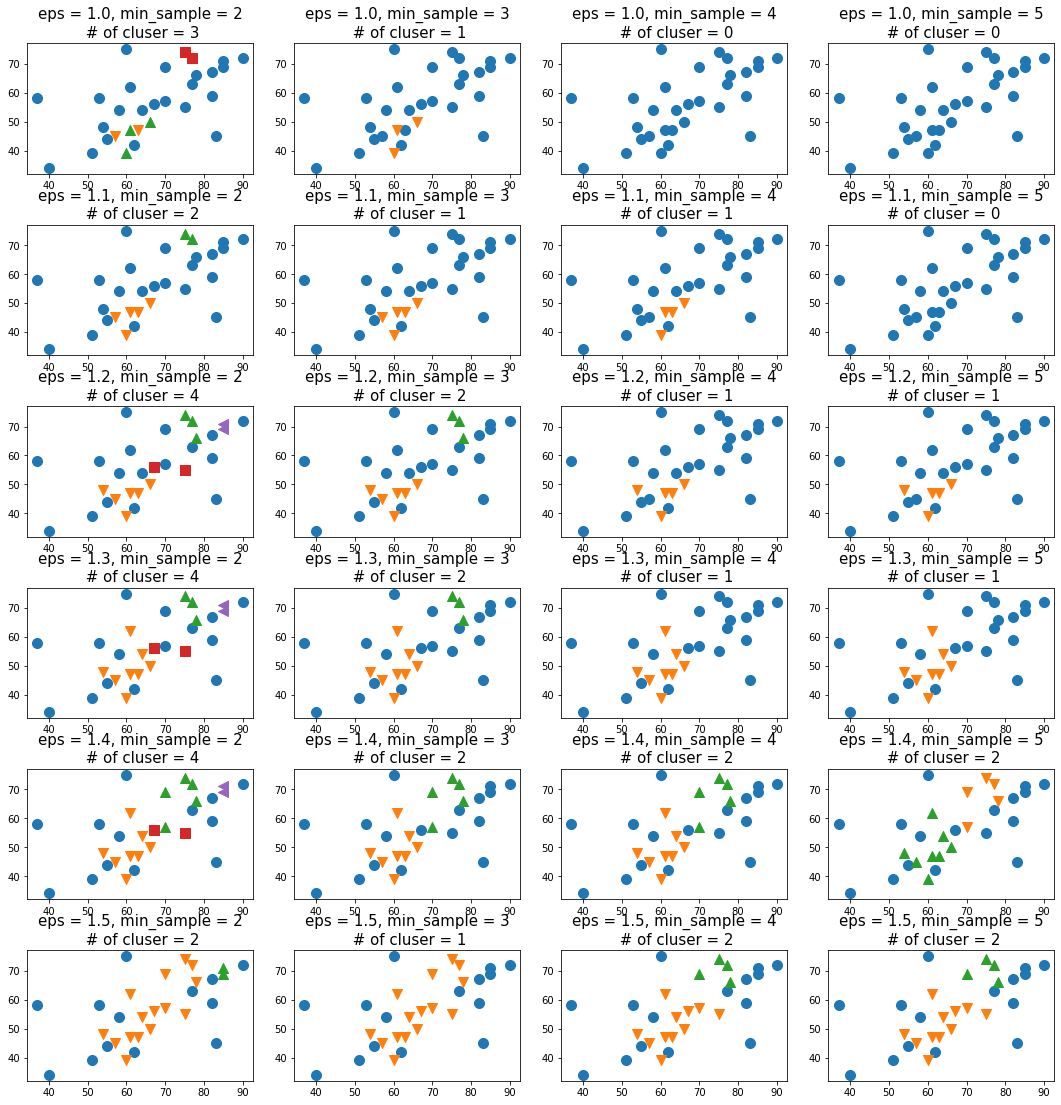

In [32]:
X = df_raw["DISSATIS"]
Y = df_raw["CHANCE"]
#데이터 point 그림 종류
markers = ["o", "v", "^", "s", "<", ">", "p", "D"]
# eps: 1.0-1.5, min_sample: 2~5
para_eps = [k/10 for k in range(10, 16, 1)]
para_min_sample = [2,3,4,5]
fig, axes = plt.subplots(len(para_eps), len(para_min_sample), figsize = (15, 15)) # plot 7H+
fig.tight_layout(w_pad=1, h_pad=3) # plot Z Z4
# enumerate): 값의 index와 값을 순차적으로 반환
for i, eps in enumerate(para_eps):
    for j, min_sample in enumerate(para_min_sample):
        dbscan = DBSCAN(min_samples=min_sample, eps = eps) # dbscan
        clusters = dbscan.fit_predict(df_raw_x) # O||
        clusters = clusters + 1 # noise의 경우-1로 표기되므로 1씩 더하여 0으로 변환
        for (n_clus, clus) in enumerate(range(min(clusters), max(clusters)+1, 1)): # 2 CE
            axes[i, j].scatter(X[clusters == clus],Y[clusters ==clus], marker = markers[n_clus], s=100)
            axes[i, j].set_title("eps = " + str(eps) + ", min_sample = "+ str(min_sample) +"\n # of cluser = " + str(max(clusters)), fontsize = 15)


In [33]:
dbscan = DBSCAN(eps = 1.4, min_samples =2).fit(df_raw_x)
cluster_dbscan = dbscan.labels_
for(i,val) in enumerate(cluster_dbscan):
    if val < 0:
        cluster_dbscan[i] = 0
    else:
        cluster_dbscan[i] = cluster_dbscan[i] +1
df_raw["ClusterDBScan"] = cluster_dbscan
df_raw.head()

,EVAL,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION,ClusterHierarchical,ClusterKmeans,ClusterDBScan
0,43,51,30,39,61,92,45,1,5,0
1,63,64,51,54,63,73,47,5,3,1
2,71,70,68,69,76,86,48,3,1,2
3,61,63,45,47,54,84,35,1,5,1
4,81,78,56,66,71,83,47,3,1,2


In [35]:
ds_summary_db = df_raw.drop(["ClusterHierarchical", "ClusterKmeans"], axis =1, inplace =False).groupby("ClusterDBScan").agg(["min","mean","max"])
level0 = ds_summary_db.columns.get_level_values(0)
level1 = ds_summary_db.columns.get_level_values(1)
ds_summary_db.columns = level0 + "_" +level1
ds_summary_db.reset_index(inplace = True)
ds_summary_db.round(3)

,ClusterDBScan,EVAL_min,EVAL_mean,EVAL_max,DISSATIS_min,DISSATIS_mean,DISSATIS_max,PRIVILEGE_min,PRIVILEGE_mean,PRIVILEGE_max,...,CHANCE_max,ADVANCE_min,ADVANCE_mean,ADVANCE_max,CRITISM_min,CRITISM_mean,CRITISM_max,PROMOTION_min,PROMOTION_mean,PROMOTION_max
0,0,40,61.00,82,37,63.846,90,30,54.385,83,...,75,43,60.154,88,49,70.615,92,25,41.923,72
1,1,48,60.75,67,54,60.750,66,42,47.250,52,...,62,51,60.500,66,73,78.625,84,33,39.125,47
2,2,65,74.40,81,70,74.000,78,46,56.400,68,...,74,71,76.200,80,77,81.800,86,46,47.200,49
3,3,58,64.50,71,67,71.000,75,42,46.000,50,...,56,66,68.000,70,66,67.000,68,35,38.000,41
4,4,74,79.50,85,85,85.000,85,64,67.500,71,...,71,77,78.000,79,74,76.500,79,55,59.000,63
